<a href="https://colab.research.google.com/github/20146467/BaiBaoCao/blob/main/CHITAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [5]:
trainset='/content/drive/MyDrive/chitay/'

In [6]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 18 images belonging to 1 classes.
Found 2 images belonging to 1 classes.


In [7]:
validation_set.class_indices

{'tay': 0}

In [8]:
{'.ipynb_checkpoints': 0,
 'tay': 1,
 }

{'.ipynb_checkpoints': 0, 'tay': 1}

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/50


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 17s 17s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 9s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 11s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 10s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 10s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 12s 12s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 10s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_a

In [12]:
model.save('monan12.hs')

In [13]:
model1=load_model('monan12.hs')

In [14]:
label = ['Van Menh Tot']

1/1 [==============================] - 0s 315ms/step
Van Menh Tot


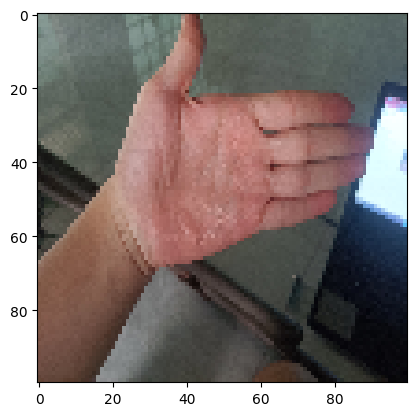

In [16]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/chitay/tay/chitay01.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])